# Machine Learning: Homework 2
## Jose Vazquez-Espinoza

codigo y libreria en: https://github.com/joseluisvaz/machine_learning_itesm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

plt.rcParams['figure.figsize'] = (5,5)

#Import own library
import ML_Algorithms.LinearMethods as lm
import ML_Algorithms.GradientDescent as gd


## Part 1: Gradient Descent

Here, we are going to plot our linearly separable classes and use linear classification

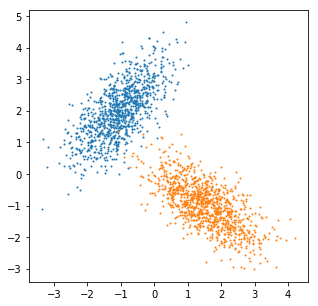

In [2]:
std = [[0.5, 0.4], [0.4,0.7]]
std2 = [[0.7, -0.4], [-0.4,0.5]]
c1 = np.random.multivariate_normal([-1, 2], std, 1000);
c2 = np.random.multivariate_normal([1.5, -1], std2, 1000);
X = np.concatenate([c1,c2])

labels = np.ones(1000)
labels2 = -1 * np.ones(1000)
Y = np.concatenate([labels, labels2])

plt.scatter(c1[:,0], c1[:,1], s=1)
plt.scatter(c2[:,0], c2[:,1], s=1)
plt.show()

Here we are going to use gradient descent for the solution

In [3]:
#Creating a classifier 

clf = gd.GradientClassifier()
clf.fit(X, Y, step="fixed", reg=0, 
        print_iter=True, step_size= 0.00001, max_iter = 1000)

coef:[ 0.         -0.05118759  0.0591836 ]
coef:[-0.08700187 -0.30511007  0.31797883]
coef:[-0.09259644 -0.30076249  0.32190469]
coef:[-0.09356309 -0.29994659  0.32263379]
coef:[-0.09373734 -0.29979932  0.32276537]
coef:[-0.09376877 -0.29977275  0.32278911]
coef:[-0.09377444 -0.29976796  0.32279339]
coef:[-0.09377546 -0.2997671   0.32279416]
coef:[-0.09377565 -0.29976694  0.3227943 ]
coef:[-0.09377568 -0.29976691  0.32279433]


In this plot we can see the path that the coefficients are following with the graddient descent

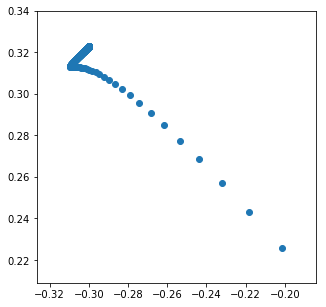

array([-0.09377569, -0.29976691,  0.32279433])

In [4]:
plt.scatter(clf.list_coef[6:,1], clf.list_coef[6:,2])
plt.show()
clf.coef

A search for the steepest  descent was implemented but the convergence was slow

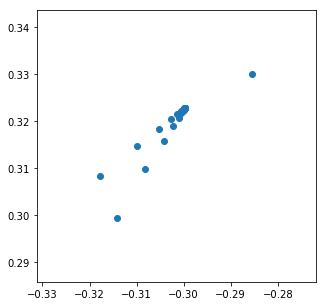

array([-0.09377568, -0.29976691,  0.32279433])

In [8]:
clf.fit(X, Y, step="golden", reg=0, 
        print_iter=False, max_iter=50)
plt.scatter(clf.list_coef[1:,1], clf.list_coef[1:,2])
plt.show()
clf.coef

The theta values are the same as the cannonical solutions

In [12]:
clf2classes = lm.LinearClassifier()
clf2classes.fit(X, Y, reg = 0)

clf2classes.coef

array([-0.08007232, -0.28955382,  0.33191815])

Wrapping the method and  trying regularization values from 0 to 100 in unit increments, we can observe that the parameters want go far away from the singularity, thats the main objective of ridge regularization, this will also give us the  advantage of not performing overffiting. We would need a validation set to calculate the mean square error

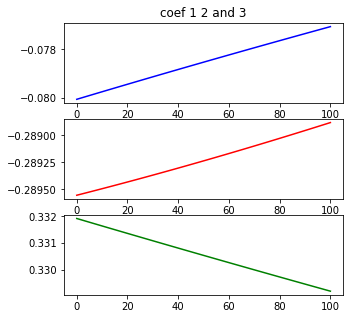

In [13]:
coefs = []
for i in range(0,100):
    clf.fit(X, Y, step="fixed", reg=i,
            step_size= 0.0001, max_iter=1000)
    coefs.append(clf.coef)
    
coefs = np.array(coefs)
l = np.linspace(0, 100,100)

plt.subplot(3, 1, 1)
plt.plot(l, coefs[:,0], 'b')
plt.title('coef 1 2 and 3')

plt.subplot(3, 1, 2)
plt.plot(l, coefs[:,1], 'r')
plt.subplot(3, 1, 3)
plt.plot(l, coefs[:,2], 'g')


plt.show()

## Part 2: Fisher Linear Discriminant

In this part we are going to implement the Fisher Linear discriminant for two classes. First we will need the covariance between classes and the covariance within-classes.

In the first step we need to calculate the covariance within classes and the means of  each class

In [9]:
cov_within = np.cov(c1[:,0], c1[:,1]) + np.cov(c2[:,0], c2[:,1])
mean_1 = np.array([np.mean(c1[:,0]) , np.mean(c1[:,1])])
mean_2 = np.array([np.mean(c2[:,0]) , np.mean(c2[:,1])])

Then we need to calculate the direction of the FLD

In [10]:
coef = np.matmul(np.linalg.inv(cov_within), (mean_2 - mean_1))
coef = coef/np.linalg.norm(coef)

And lastly we only need to calculate the bias, we can also observe that the FLD separates both classes perfectly

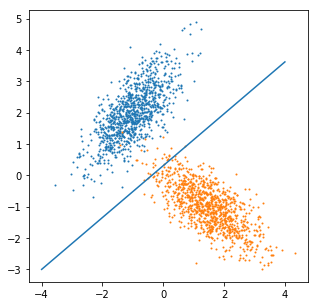

In [11]:
dataset_mean = mean_1 = np.array([np.mean(X[:,0]) , np.mean(X[:,1])])
bias = -np.dot(coef,dataset_mean)

x = np.linspace(-4,4,100)
f = -1/coef[1] * (bias + coef[0]*x)

plt.scatter(c1[:,0], c1[:,1], s=1)
plt.scatter(c2[:,0], c2[:,1], s=1)
plt.plot(x,f)
plt.show()

## Part 3: Distributions

Here we can see the distributions that we want to multiply, the likelihoood is the normal distribution and we have an a uniform prior

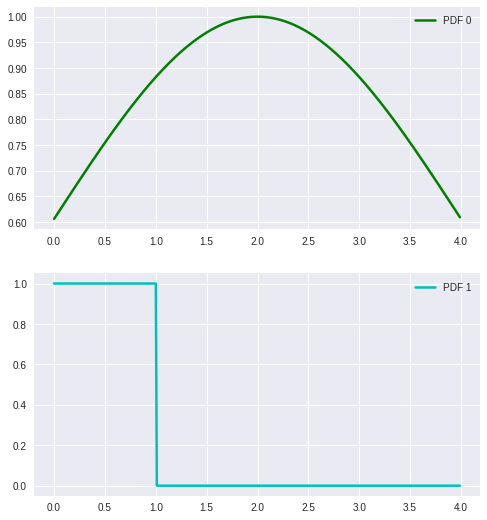

In [12]:
import SliceSampler as ss

sampler = ss.SliceSampler(precision = 0.01)
sampler.Set_Distribution(mu=2.0,sigma=2.0)
sampler.Display_List_Dist()  

Now we can check the posterior distribution and we can also perform a simulation to see the distribution of the posterior sampling

Iteration General Slice Sampler0
Iteration General Slice Sampler1000
Iteration General Slice Sampler2000
Iteration General Slice Sampler3000
Iteration General Slice Sampler4000
Iteration General Slice Sampler5000
Iteration General Slice Sampler6000
Iteration General Slice Sampler7000
Iteration General Slice Sampler8000
Iteration General Slice Sampler9000


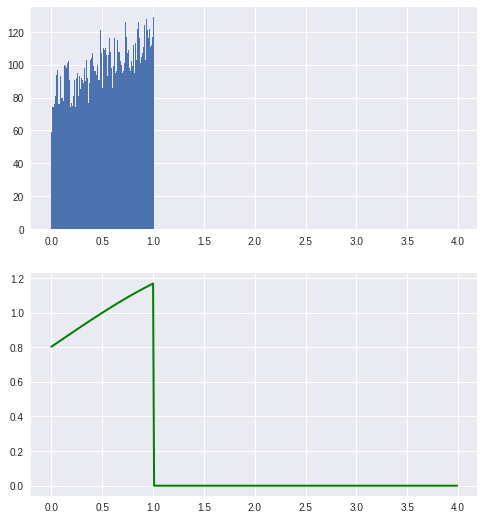

In [13]:
sampler.General_Slice_Sampler(itera=10000)
sampler.DisplayDistribution()